<a href="https://colab.research.google.com/github/FrancoPalavicinoG/ML_courses/blob/main/notebooks/Tarea1_preprocessing_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio 1 - Pre-procesamiento de texto
#Curso Anal√≠tica Textual con Machine Learning

Profesora: Carla Vairetti

Los datos en el mundo real suelen **estar incompletos y tener inconsistencias**. Por esto, es necesario preparar los datos antes de ejecutar modelos de anal√≠tica.

En este primer laboratorio prepararemos datos de texto para que en los pr√≥ximos laboratorios encontremos **patrones valiosos para la toma de decisiones**.

Primero es necesario **importar las librer√≠as** con las que vamos a trabajar. Esto es necesario hacerlo siempre que queramos correr este c√≥digo.

In [ ]:
import pandas as pd
import numpy as np
# NLTK (Natural Language ToolKit) es una libreria para NLP
import nltk
# Existe extensiones que debemos descargar
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from collections import defaultdict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#LLamar a un archivo en Google Drive

El siguiente paso es montar Google Drive para poder enlazar nuestra base de datos. De esta forma podemos cargar despu√©s nuestra base de datos tripadvisor-rest5000.xlsx (que tenemos que tener en una carpeta ‚ÄúColab Notebooks‚Äù en nuestro Drive claramente identificada).

Esta base de datos cuenta con comentarios de Tripadvisor de restaurants chilenos entre los a√±os 2007 y 2015.

**Cuando corra la siguiente l√≠nea, siga las intrucciones indicando la cuenta de Google correspondiente y aceptando las condiciones.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Una vez cargado nuestro drive, llamamos a nuestra base de datos:

In [ ]:
ruta_data_set = '/content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/COAH dataset.xlsx'
df = pd.read_excel(ruta_data_set)

Descripci√≥n de variables de la base de datos:

1.   **Titulo**: T√≠tulo del comentario (ingresado por usuario).
2.   **Rating**: Nota otorgada por el usuario (del 1 al 5, con 5 mayor satisfacci√≥n).
3.   **Comentario**: Cuerpo del comentario (ingresado por usuario).
4.   **Dia**: Fecha de comentario.



In [ ]:
df.describe(include='all')

id         rank   abstract  \
count   1816.000000  1816.000000       1816   
unique          NaN          NaN       1681   
top             NaN          NaN  Excelente   
freq            NaN          NaN         15   
mean     908.500000     3.400881        NaN   
std      524.378362     1.440875        NaN   
min        1.000000     1.000000        NaN   
25%      454.750000     2.000000        NaN   
50%      908.500000     4.000000        NaN   
75%     1362.250000     5.000000        NaN   
max     1816.000000     5.000000        NaN   

                                                   review  
count                                                1816  
unique                                               1792  
top     No entiendo esta mala fama q se le intenta cre...  
freq                                                    2  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

# An√°lisis Exploratorio de Datos: Variable Objetivo

El AED consiste en **examinar los datos para entenderlos, ver relaciones entre variables y encontrar posibles inconsistencias**.

Para esto, se analiza estad√≠stica descriptiva y gr√°Ô¨Åcos.

Para analizar el comportamiento de los datos de la variable objetivo (rating), generamos un gr√°fico de barras.

rank
5    531
4    489
1    312
3    285
2    199
Name: count, dtype: int64


<Axes: xlabel='rank'>

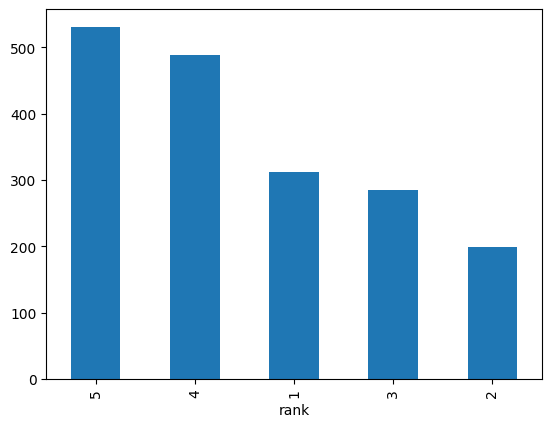

In [ ]:
print(df['rank'].value_counts())
df['rank'].value_counts().plot(kind='bar')

De la tabla y gr√°fico anterior, podemos **identificar inconsistencias** (*gif*), las cuales eliminaremos antes de seguir.

In [ ]:
# Verificamos que en Rating solo hay valores numericos, si no se cambia a Nan
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df = df.dropna(subset=['rank'])
df

id  rank                                          abstract  \
0        1     5                        Un hotel digno de menci√≥n!   
1        2     4  Recomendable 100%, sin lujos pero todo perfecto.   
2        3     3                                         Decepci√≥n   
3        4     5                      Por segunda vez, inmejorable   
4        5     5                                   No tan sorpresa   
...    ...   ...                                               ...   
1811  1812     5           remanso de paz en el coraz√≥n de C√≥rdoba   
1812  1813     5             Oasis de paz, tranquilidad y belleza!   
1813  1814     5                            Un lugar para recordar   
1814  1815     5                                    Extraordinario   
1815  1816     5  Ojal√° hubiese hoteles as√≠ en todas las ciudades.   

                                                 review  
0     Como bien les coment√© a los propietarios a la ...  
1     Estuvimos dos d√≠as con mi familia, reservando ...  
2     Hab√≠amos escogido este hotel por las buenas op...  
3     Hemos vuelto por segunda vez a este estupendo ...  
4     He estado dos d√≠as en Granada por trabajo, soy...  
...                                                 ...  
1811  Hemos empezado el a√±o con una estancia de tres...  
1812  Al atravesar el umbral de la puerta que conduc...  
1813  En este hotel todo son sensaciones y experienc...  
1814  Hemos pasado un par de noches en este exquisit...  
1815  El hotel es precioso, esta muy bien ubicado pa...  

[1816 rows x 4 columns]

Utilizaremos la definici√≥n cl√°sica en an√°lisis de sentimientos **recodificando** el rating en los siguientes valores:

1 y 2 -> 0 (Negativo)

3 -> 1 (Neutro)

4 y 5 -> 2 (Positivo)



rank
2    1020
0     511
1     285
Name: count, dtype: int64


<Axes: xlabel='rank'>

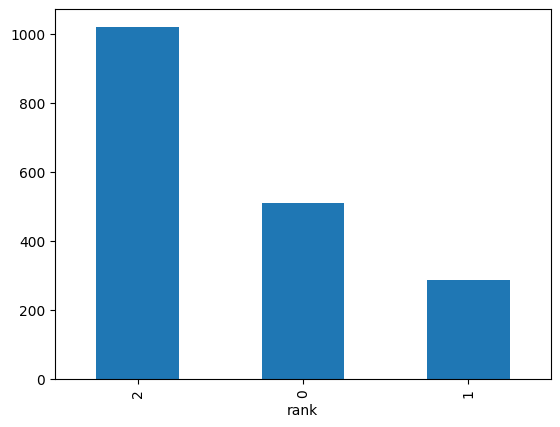

In [ ]:
df['rank'] = df['rank'].replace({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})

# Imprimir y graficar la distribucion de los ratings simplificados
print(df['rank'].value_counts())
df['rank'].value_counts().plot(kind='bar')

# T√©cnicas de procesamiento de texto

Vamos a hacer un recorrido por los pasos b√°sicos del pre-procesamiento de texto. Estos pasos son necesarios para transformar texto del lenguaje humano a un formato legible para m√°quinas para su posterior procesamiento, particularmente motiva esta publicaci√≥n el procesamiento en PyTorch.

Veremos c√≥mo realizar estos pasos con c√≥digo propio, para mayor entendimiento de lo que est√° sucediendo, y con spaCy, una herramienta de nuestro agrado.

En concreto, los pasos son:

1. **Limpieza**, la remoci√≥n del contenido no deseado.
2. **Normalizaci√≥n**, la conversi√≥n diferentes formas a una sola.
3. **Tokenizaci√≥n**, la separaci√≥n del texto en t√≥kenes (unidades m√≠nimas, por ejemplo palabras).
4. Separaci√≥n en **conjuntos de datos**: entrenamiento, validaci√≥n, prueba.
5. Generaci√≥n del **vocabulario**, la lista de t√≥kenes conocidos.
6. **Numericalizaci√≥n**, el mapeo de t√≥kenes a n√∫meros enteros.

Estos pasos son comunes distintas aproximaciones al procesamiento del lenguaje.

## Expresiones regulares

Si las expresiones regulares no te resultan familiares entonces vale la pena estudiarlas brevemente, ya que las usaremos. Pod√©s mirar este [tutorial](https://robologs.net/2019/05/05/como-utilizar-expresiones-regulares-regex-en-python) que encontramos en la web.

In [ ]:
import re

## Limpieza

**Muchas t√©cnicas modernas no realizan limpieza alguna**.

Dependiendo de lo que queramos hacer tal vez convenga deshacernos de algunos elementos.

En el dataset de ejemplo los signos de puntuaci√≥n no parecen tener gran relevancia, quiz√°s tampoco la tengan los n√∫meros (que aparentemente han sido removidos de antemano).

In [ ]:
def limpiar(texto):
    puntuaci√≥n = r'[,;.:¬°!¬ø?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'

    # signos de puntuaci√≥n
    texto = re.sub(puntuaci√≥n, ' ', texto)

    # d√≠gitos [0-9]
    texto = re.sub('\d', ' ', texto)

    return texto

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1242384494.py:8: SyntaxWarning: invalid escape sequence '\d'
  texto = re.sub('\d', ' ', texto)


En esta funci√≥n substituimos los signos de puntuaci√≥n
    
    , ; . : ¬° ! ¬ø ? @ # $ % & [ ] ( ) { } < > ~ = + - * / | \ _ ^ ` " '

por espacios (me gusta m√°s; usar string vac√≠o `''` para eliminarlos) medieante expresiones regulares (algunos caracteres tuvieron que ser escapados anteponiendo `\` por tener un significado especial para la expresi√≥n regular). Hacemos lo mismo con los d√≠gitos.

Veamos un ejemplo de funcionamiento.

In [ ]:
limpiar('hoy 13 trabajan?')

'hoy    trabajan '

Otros elementos que podr√≠amos pensar en remover son caracteres invisibles, espacios redundantes. Veremos que esto en particular tambi√©n puede ser resulto en la tokenizaci√≥n.

## Normalizaci√≥n

Normalizar es la tarea de **llevar lo que puede ser expresado de m√∫ltiples maneras como fechas, n√∫meros y abreviaturas a una √∫nica forma**.

Por ejemplo:

     13/03/30 -> trece de marzo de dos mil treinta
     FICA -> Facultad de Ingenier√≠a y Ciencias Aplicadas

Se trata de una pr√°ctica cl√°sica de la √©poca de los modelos de lenguaje probabil√≠sticos, que intentaban reducir lo m√°s posible la cantidad de palabras. En cierta forma 1 palabra = 1 atributo (lo que en los '90s conocimos como convertibilidad).

Elegir atributos es ingenier√≠a de atributos, la parte central del *machine learning*, y lo justamente lo que el *deep learning* busca automatizar.

Sin embargo hay una normalizaci√≥n muy com√∫n hoy, el **convertir todo el texto a min√∫sculas**. En el caso del espa√±ol, una normalizaci√≥n com√∫n es la **remoci√≥n de tildes**.

In [ ]:
def normalizar(texto):
    # todo a min√∫sculas
    texto = texto.lower()

    # tildes y diacr√≠ticas
    texto = re.sub('√°', 'a', texto)
    texto = re.sub('√©', 'e', texto)
    texto = re.sub('√≠', 'i', texto)
    texto = re.sub('√≥', 'o', texto)
    texto = re.sub('√∫', 'u', texto)
    texto = re.sub('√º', 'u', texto)
    texto = re.sub('√±', 'n', texto)

    return texto

Veamos un ejemplo:

In [ ]:
normalizar('Me podr√°n dar informaci√≥n de un pr√©stamo personal')

'me podran dar informacion de un prestamo personal'

Hay una librer√≠a llamada [unidecode](https://pypi.org/project/Unidecode) que realiza transliteraci√≥n: representa letras o palabras de un alfabeto en otro, √∫til si tenemos caracteres en ruso (cir√≠lico) o chino (caracteres Han), a√∫n √∫til para el alfabeto latino cuando queremos pasar de Unicode a ASCII (lo que substituir√≠a las tildes).

    pip install unidecode

In [ ]:
pip install unidecode

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 235.8/235.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

unidecode('Me podr√°n dar informaci√≥n de un pr√©stamo personal')

'Me podran dar informacion de un prestamo personal'

Una normalizaci√≥n que vale la pena intentar con este dataset es la **correci√≥n ortogr√°fica** con un paquete como [pyspellchecker](https://pypi.org/project/pyspellchecker). Quiz√°s con art√≠culos de diarios en los que la redacci√≥n est√° m√°s cuidada esto no valga la pena, pero en contextos m√°s informales como este, conversaciones por char, Twitter, las palabras mal escritas en realidad refieren a una sola palabra y no a distintos significados.

## Tokenizaci√≥n

Tokenizar es **separar el texto en partes m√°s peque√±as llamadas t√≥kenes**.

Una unidad muy com√∫n es la palabras pero depende de lo que queramos hacer, si es que no hemos eliminado a los signos de puntuaci√≥n estos tambi√©n ser√≠an t√≥kenes. Las palabras frecuentemente est√°n compuestas por una ra√≠z, prefijo y/o sufijo, por lo que podr√≠amos decidir separarlos tambi√©n. En ingl√©s es com√∫n separar `it's` en `it` y `'s`, si bien en espa√±ol esta situaci√≥n no es com√∫n.

A diferencia de la limpieza y la normalizaci√≥n, la tokenizaci√≥n **es un paso indispesable** en la preparaci√≥n de texto para su procesamiento.

Para el dataset en cuesti√≥n la tokenizaci√≥n es simple, vamos a separar se«µun espacios y dem√°s caracteres invisibles como `\t` (tabulaci√≥n) y `\n` (salto de l√≠nea). De haber signos de puntuaci√≥n, pro ejemplo si quisi√©ramos procesar un documento extenso en oraciones, el proceso es m√°s complejo ya que `final.` tiene un punto en vez de un espacio, y no siempre los puntos demarcan el final de un t√≥ken como en `A.M.` y `P.M.`.


**La tokenizaci√≥n es clave para que los modelos logren comprender el texto como elementos individuales.** Este es un ejemplo ilustrativo para ver el pre-procesamiento que le haremos a
todos las filas del DataFrame

Debemos definir si elementos como los signos de puntuaci√≥n son t√≥kenes o si simplemente delimitan palabras o t√≥kenes, en cuyo caso desaparecer√≠an en el proceso. Mismo con los caracteres invisibles, si estuvi√©semos haciendo un modelo que programe en Python, la indentaci√≥n es fundamental y deberiera mantenerse.

In [ ]:
def tokenizar(texto):
    # IMPORTANTE: podr√≠a devolver una lista vac√≠a
    return [t√≥ken for t√≥ken in texto.split()]

`split` tambi√©n se encarga de los caracteres invisibles repetidos.

In [ ]:
tokenizar('hola vengo       a flotar')

['hola', 'vengo', 'a', 'flotar']

*Ac√° estamos cambiando el tipo de datos, ya que de un string hemos pasado a una lista de strings.*

Si la expresi√≥n dentro de la funci√≥n no te resulta familiar, es una construcci√≥n llamada *list comprehension* y es una manera muy efectiva de armar una lista. Es lo mismo que hacer

In [ ]:
lista = []

for i in range(10):
    lista.append(i)

lista

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

pero de una manera m√°s expresiva y tambi√©n m√°s eficiente (est√° optimizado por el lenguaje)

In [ ]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Varios modelos de lenguaje utilizan caracteres en vez de palabras como t√≥kenes, esto es √∫til por varios motivos que listaremos m√°s adelante. Otros utilizan partes de palabras como s√≠labas (las partes se determinan estad√≠sticamente). Ver https://arxiv.org/pdf/1508.07909.pdf.

### Tokenizaci√≥n utilizando alguna librer√≠a


In [ ]:
# word_tokenize toma un string y separa todas las palabras y simbolos dentro de una lista (trata espacios y \n iguales),
# necesitamos que las palabras o tokens sean tratados individualmente pero manteniendo la secuencia original
test = '''
Excelente atencion,
tanto del due√±o del restaurant como de los meseros,
nos encanto la diversidad de sabores y grato ambiente,
excelente ubicacion (muy central).
'''

tokenizar2 = word_tokenize(test)
tokenizar2

['Excelente',
 'atencion',
 ',',
 'tanto',
 'del',
 'due√±o',
 'del',
 'restaurant',
 'como',
 'de',
 'los',
 'meseros',
 ',',
 'nos',
 'encanto',
 'la',
 'diversidad',
 'de',
 'sabores',
 'y',
 'grato',
 'ambiente',
 ',',
 'excelente',
 'ubicacion',
 '(',
 'muy',
 'central',
 ')',
 '.']

## Otros pre-procesos

Cl√°sicamente se aplicaban alguno de estos para reducir a√∫n m√°s la cantidad de palabras:

#### *Stemming*

*Stem*, de ra√≠z, reduce la inflecci√≥n de las palabras, mapeando un grupo de palabras a la misma ra√≠z, sin importar si la ra√≠z es una palabras v√°lida en el lenguaje.

Las palabras "programaci√≥n", "programador" y "programas" pueden reducirse a la ra√≠z "programa". Esto es √∫til para normalizar el vocabulario y reducir la redundancia, permitiendo que los modelos de PNL comprendan mejor los contextos.

El "stemming" usa listas de prefijos y sufijos para cortar palabras a su ra√≠z. Aunque tiene ventajas, tambi√©n presenta limitaciones.

**Ventajas**:

* Mejora del rendimiento: Reduce el n√∫mero de palabras √∫nicas, mejorando la eficiencia del modelo.
* Agrupaci√≥n de palabras similares: Ayuda en tareas como la clasificaci√≥n de documentos.
* Facilita el an√°lisis: Simplifica el an√°lisis y comparaci√≥n de textos, √∫til en an√°lisis de sentimiento.

**Desventajas**:

* Sobretemplatado: Puede agrupar palabras como "universal", "university" y "universe", que tienen significados diferentes.
* Falsos negativos: No siempre agrupa correctamente palabras que deber√≠an ser tratadas como sin√≥nimos.
* Retos ling√º√≠sticos: La complejidad aumenta con la morfolog√≠a y ortograf√≠a de la lengua de destino.

     caminando, caminar, camino -> camin


In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")

ps = PorterStemmer()

example_words = ["program","programming","programer","programs","programmed"]


print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
program             program             
programming         program             
programer           program             
programs            program             
programmed          program             


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### *Lemmatization*

A diferencia del *stemming*, la lematizaci√≥n reduce las palabras inflexadas a palabras que pertenecen al lenguaje. La ra√≠z pasa a llamarse *lema* ("corre", "corriendo" y "corri√≥" en "correr").

**Ventajas**:

* Precisi√≥n: Considera el contexto y produce palabras de diccionario verdaderas, no solo cortando palabras como el stemming.

**Desventajas**:

* Tiempo: Es un proceso lento y laborioso debido al an√°lisis morfol√≥gico y uso de un diccionario.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

wnl = WordNetLemmatizer()

example_words = ["program","programming","programer","programs","programmed"]


print("{0:20}{1:20}".format("--Word--","--Lemma--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--Word--            --Lemma--           
program             program             
programming         program             
programer           programer           
programs            program             
programmed          program             


In [ ]:
def lematize(texto):
    return [wnl.lemmatize(t√≥ken) for t√≥ken in texto]

## Primera parte del pre-procesamiento

Definamos las funciones necesarias para el pre-procesamiento:

In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

def preprocesar(texto):
    texto = limpiar(texto)
    texto = normalizar(texto)
    texto = tokenize(texto)
    texto = lematize(texto)

    return texto

### *Stop words*

Hay listas armadas de palabras muy comunes (*stop words*). Podemos elaborarla de alguna manera o usar alguna existente.

    pip install nltk

https://github.com/Alir3z4/stop-words/blob/master/spanish.txt

Definamos la funcion que remueve las stopwords

In [ ]:
pip install nltk

In [ ]:
def rem_stopwords(tokens):
    texto_final = []
    for token in tokens: # Removed pos_tag
        if token not in stopwords.words('spanish'):
            texto_final.append(token)
    # return ' '.join(texto_final)
    return texto_final

# Convertir a lambda

from nltk.corpus import stopwords
# Removed pos_tag import

spanish_stopwords = set(stopwords.words('spanish'))
rem_stopwords2 = lambda tokens: [token for token in tokens if token not in spanish_stopwords] # Modified lambda

In [ ]:

# Utilizamos la libreria TQDM para poder visualizar barras de progreso
from tqdm.notebook import tqdm
tqdm.pandas()

# Se puede crear una una columna basada en otra utilizando una funcion y
# a la columna que queremos basarnos en usamos .apply o .progress_apply (con barra de progreso)

df['review_tokenizado'] = df['review'].progress_apply(preprocesar)

# Pre-procesamiento del Dataframe entero son approx. 15 min
#df['comentario_tokenizado'] = df['comentario_tokenizado'].progress_apply(rem_stopwords) lentooooo!!!!
df['review_tokenizado'] = df['review_tokenizado'].progress_apply(rem_stopwords2)

# Tambi√©n preprocesamiento del titulo
df['abstract_tokenizado'] = df['abstract'].progress_apply(preprocesar)
df['abstract_tokenizado'] = df['abstract_tokenizado'].progress_apply(rem_stopwords2)

df

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

id  rank                                          abstract  \
0        1     2                        Un hotel digno de menci√≥n!   
1        2     2  Recomendable 100%, sin lujos pero todo perfecto.   
2        3     1                                         Decepci√≥n   
3        4     2                      Por segunda vez, inmejorable   
4        5     2                                   No tan sorpresa   
...    ...   ...                                               ...   
1811  1812     2           remanso de paz en el coraz√≥n de C√≥rdoba   
1812  1813     2             Oasis de paz, tranquilidad y belleza!   
1813  1814     2                            Un lugar para recordar   
1814  1815     2                                    Extraordinario   
1815  1816     2  Ojal√° hubiese hoteles as√≠ en todas las ciudades.   

                                                 review  \
0     Como bien les coment√© a los propietarios a la ...   
1     Estuvimos dos d√≠as con mi familia, reservando ...   
2     Hab√≠amos escogido este hotel por las buenas op...   
3     Hemos vuelto por segunda vez a este estupendo ...   
4     He estado dos d√≠as en Granada por trabajo, soy...   
...                                                 ...   
1811  Hemos empezado el a√±o con una estancia de tres...   
1812  Al atravesar el umbral de la puerta que conduc...   
1813  En este hotel todo son sensaciones y experienc...   
1814  Hemos pasado un par de noches en este exquisit...   
1815  El hotel es precioso, esta muy bien ubicado pa...   

                                      review_tokenizado  \
0     [bien, comente, propietarios, hora, abandonar,...   
1     [do, dia, familia, reservando, do, habitacione...   
2     [habiamos, escogido, hotel, buenas, opiniones,...   
3     [vuelto, segunda, vez, estupendo, hotel, grana...   
4     [do, dia, granada, trabajo, autonomo, busco, a...   
...                                                 ...   
1811  [empezado, ano, estancia, tres, noches, hotel,...   
1812  [atravesar, umbral, puerta, conduce, zaguan, h...   
1813  [hotel, sensaciones, experiencias, positivas, ...   
1814  [pasado, par, noches, exquisito, hotel, regent...   
1815  [hotel, precioso, bien, ubicado, recorrer, cor...   

                        abstract_tokenizado  
0                   [hotel, digno, mencion]  
1           [recomendable, lujos, perfecto]  
2                               [decepcion]  
3               [segunda, vez, inmejorable]  
4                           [tan, sorpresa]  
...                                     ...  
1811       [remanso, paz, corazon, cordoba]  
1812    [oasis, paz, tranquilidad, belleza]  
1813                      [lugar, recordar]  
1814                       [extraordinario]  
1815  [ojala, hoteles, asi, toda, ciudades]  

[1816 rows x 6 columns]

Ahora estamos en condiciones de pre-procesar todo lo que tenemos:

In [ ]:
## Pre-procesamiento del Dataframe entero son approx. 15 min
df['review_texto_final'] = [preprocesar(doc) for doc in df['review'].values]
# Agregamos tambien una columna con la cantidad de tokens en el sample
df['review_texto_final_len'] = df['review_texto_final'].apply(lambda x: len(x))
# Finalmente botamos cualquier fila (sample) que sea una lista vacia
df = df[df['review_texto_final_len'] != 0]

#Ahora del abstract
df['abstract_texto_final'] = [preprocesar(doc) for doc in df['abstract'].values]
df['abstract_texto_final_len'] = df['abstract_texto_final'].apply(lambda x: len(x))
df = df[df['abstract_texto_final_len'] != 0]
df

id  rank                                          abstract  \
0        1     2                        Un hotel digno de menci√≥n!   
1        2     2  Recomendable 100%, sin lujos pero todo perfecto.   
2        3     1                                         Decepci√≥n   
3        4     2                      Por segunda vez, inmejorable   
4        5     2                                   No tan sorpresa   
...    ...   ...                                               ...   
1811  1812     2           remanso de paz en el coraz√≥n de C√≥rdoba   
1812  1813     2             Oasis de paz, tranquilidad y belleza!   
1813  1814     2                            Un lugar para recordar   
1814  1815     2                                    Extraordinario   
1815  1816     2  Ojal√° hubiese hoteles as√≠ en todas las ciudades.   

                                                 review  \
0     Como bien les coment√© a los propietarios a la ...   
1     Estuvimos dos d√≠as con mi familia, reservando ...   
2     Hab√≠amos escogido este hotel por las buenas op...   
3     Hemos vuelto por segunda vez a este estupendo ...   
4     He estado dos d√≠as en Granada por trabajo, soy...   
...                                                 ...   
1811  Hemos empezado el a√±o con una estancia de tres...   
1812  Al atravesar el umbral de la puerta que conduc...   
1813  En este hotel todo son sensaciones y experienc...   
1814  Hemos pasado un par de noches en este exquisit...   
1815  El hotel es precioso, esta muy bien ubicado pa...   

                                      review_tokenizado  \
0     [bien, comente, propietarios, hora, abandonar,...   
1     [do, dia, familia, reservando, do, habitacione...   
2     [habiamos, escogido, hotel, buenas, opiniones,...   
3     [vuelto, segunda, vez, estupendo, hotel, grana...   
4     [do, dia, granada, trabajo, autonomo, busco, a...   
...                                                 ...   
1811  [empezado, ano, estancia, tres, noches, hotel,...   
1812  [atravesar, umbral, puerta, conduce, zaguan, h...   
1813  [hotel, sensaciones, experiencias, positivas, ...   
1814  [pasado, par, noches, exquisito, hotel, regent...   
1815  [hotel, precioso, bien, ubicado, recorrer, cor...   

                        abstract_tokenizado  \
0                   [hotel, digno, mencion]   
1           [recomendable, lujos, perfecto]   
2                               [decepcion]   
3               [segunda, vez, inmejorable]   
4                           [tan, sorpresa]   
...                                     ...   
1811       [remanso, paz, corazon, cordoba]   
1812    [oasis, paz, tranquilidad, belleza]   
1813                      [lugar, recordar]   
1814                       [extraordinario]   
1815  [ojala, hoteles, asi, toda, ciudades]   

                                     review_texto_final  \
0     [como, bien, le, comente, a, los, propietarios...   
1     [estuvimos, do, dia, con, mi, familia, reserva...   
2     [habiamos, escogido, este, hotel, por, la, bue...   
3     [hemos, vuelto, por, segunda, vez, a, este, es...   
4     [he, estado, do, dia, en, granada, por, trabaj...   
...                                                 ...   
1811  [hemos, empezado, el, ano, con, una, estancia,...   
1812  [al, atravesar, el, umbral, de, la, puerta, qu...   
1813  [en, este, hotel, todo, son, sensaciones, y, e...   
1814  [hemos, pasado, un, par, de, noches, en, este,...   
1815  [el, hotel, e, precioso, esta, muy, bien, ubic...   

      review_texto_final_len  \
0                        171   
1                        184   
2                        138   
3                        104   
4                        188   
...                      ...   
1811                     229   
1812                     480   
1813                     215   
1814                      68   
1815                      40   

                                   abstract_texto_final  \
0                   

## Vocabulario

Este paso es importante. Aqu√≠ definimos y limitamos la t√≥kenes que vamos a utilizar. El lenguaje es infinito, para convertirlo en un problema tratable muchas veces los que hacemos es reducirlo. Clave para varias pr√°cticas de reducci√≥n es contar las frecuencias de los t√≥kenes, esto es, cu√°ntas veces aparece cada t√≥ken en todo el corpus.
* Las palabras m√°s frecuentes no aportan mucha informaci√≥n
* Las m√°s infrecuentes si bien son las que m√°s informaci√≥n tienen no llegar√°n a ser representativas para nuestro modelo.
* Descartar palabras poco frecuentes tambi√©n afecta a errores ortogr√°ficos.

√ötil para este paso es la clase `Counter` de la librer√≠a est√°ndar de Python.

In [ ]:
from collections import Counter

c = Counter(['a','b','c','a','b','a'])

# obtener los dos elementos m√°s comunes y sus frecuencias
c.most_common(2)

[('a', 3), ('b', 2)]

Una funci√≥n de la librer√≠a est√°ndar llamada `chain` nos dar√° una mano convirtiendo la lista de listas de t√≥kenes en una lista de t√≥kenes, similar a `numpy.flatten`, ya que `Counter` espera una lista con elementos a contar y nuestros t√≥kenes est√°n separados por documentos, hay que juntarlos.

In [ ]:
from itertools import chain

list(chain(['a','b','c'], ['c','d']))

['a', 'b', 'c', 'c', 'd']

`chain` encadena las listas que le pasamos como argumentos variables. Podemos usar el operador *splat* `*` para contentar a la funci√≥n (convertir la lista principal en una serie de argumentos).

In [ ]:
list(chain( *[ ['a','b','c'], ['c','d'] ] ))

['a', 'b', 'c', 'c', 'd']

En vez de una lista podemos pedir un conjunto (`set`), en el que los elementos no se repiten. Este bien podr√≠a ser el vocabulario.

In [ ]:
set(chain( *[ ['a','b','c'], ['c','d'] ] ))

{'a', 'b', 'c', 'd'}

En definitiva, es la lista oficial de t√≥kenes.

In [ ]:
# versi√≥n 1
class Vocab():
    def fit(self, lote):
        self.vocabulario = set(chain(*lote))

        return self

    def __len__(self):
        return len(self.vocabulario)

Es importante generar el vocabulario, ya que como mencionamos se trata de la lista de palabras conocidas.
Le agregamos un `__len__` porque tambi√©n es √∫til conocer el tama√±o del vocabulario.

In [ ]:
v = Vocab().fit(df['review_tokenizado'])
len(v)

13955

¬øQu√© pasa con las palabras que no est√°n en la lista? Se las conoce como t√≥kenen **fuera del vocabulario** (*out-of-vocabulary*, abreviado OOV). Estas requieren acciones especiales, podr√≠amos
* ignorarlas
* reemplazarlas por un t√≥ken especial
* inferirlas (embeddings !!!!)

In [ ]:
# versi√≥n 1.1
class Vocab():
    def __init__(self, t√≥ken_desconocido='<unk>'):
        self.t√≥ken_desconocido = t√≥ken_desconocido

    def fit(self, lote):
        self.vocabulario = list(set(chain(*lote)))

        if self.t√≥ken_desconocido:
            self.vocabulario.append(self.t√≥ken_desconocido)

        return self

    def transform(self, lote):
        if self.t√≥ken_desconocido: # reemplazar
            return [[t√≥ken if t√≥ken in self.vocabulario else self.t√≥ken_desconocido for t√≥ken in doc] for doc in lote]
        else: # ignorar
            return [[t√≥ken for t√≥ken in doc if t√≥ken in self.vocabulario] for doc in lote]

    def __len__(self):
        return len(self.vocabulario)

In [ ]:
Vocab().fit(df['review_tokenizado']).transform([
    ['lugar', 'es', 'bonito', 'tiene', 'buen', 'ambiente', 'es', 'Greatest'],
    ['increible', 'el', 'cocinero', 'y', 'el', 'dentista'],
])

[['lugar', '<unk>', 'bonito', '<unk>', 'buen', 'ambiente', '<unk>', '<unk>'],
 ['increible', '<unk>', 'cocinero', '<unk>', '<unk>', '<unk>']]

## Numericalizaci√≥n

Tambi√©n conocido como indexaci√≥n. As√≠ como a las unidades m√≠nimas que consideramos las llamamos t√≥kenes, a los n√∫meros que los representan los llamamos **√≠ndices**. Ya que el vocabulario tiene la lista de t√≥kenes, le vamos a pedir una responsabilidad adicional: que mantenga una asignaci√≥n entre t√≥kenes y n√∫meros enteros.

Es com√∫n pasarle valores no n√∫mericos a un estimador y ver c√≥mo falla.

In [ ]:
vocabulario = ['a','b','c','d','<unk>']

{t√≥ken: √≠ndice for √≠ndice, t√≥ken in enumerate(vocabulario)}

{'a': 0, 'b': 1, 'c': 2, 'd': 3, '<unk>': 4}

que es lo mismo que:

In [ ]:
mapeo = {}

for √≠ndice, t√≥ken in enumerate(vocabulario):
    mapeo[t√≥ken] = √≠ndice

mapeo

{'a': 0, 'b': 1, 'c': 2, 'd': 3, '<unk>': 4}

¬øQu√© es lo que hace `enumerate`? Como su nombre lo indica, enumera los elementos de una colecci√≥n.

In [ ]:
list(enumerate(vocabulario))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, '<unk>')]

In [ ]:
# versi√≥n 2
class Vocab():
    def __init__(self, t√≥ken_desconocido='<unk>'):
        self.t√≥ken_desconocido = t√≥ken_desconocido

    def fit(self, lote):
        vocabulario = list(set(chain(*lote)))

        if self.t√≥ken_desconocido:
            vocabulario.append(self.t√≥ken_desconocido)

        self.mapeo = {t√≥ken: √≠ndice for √≠ndice, t√≥ken in enumerate(vocabulario)}

        return self

    def transform(self, lote):
        if self.t√≥ken_desconocido: # reemplazar
            return [[t√≥ken if t√≥ken in self.mapeo else self.t√≥ken_desconocido for t√≥ken in doc] for doc in lote]
        else: # ignorar
            return [[t√≥ken for t√≥ken in doc if t√≥ken in self.mapeo] for doc in lote]

    def __len__(self):
        return len(self.mapeo)

Comprobemos que la nueva versi√≥n de `Vocab` funciona como la anterior. Adem√°s veamos qu√© sucedo cuando no queremos el t√≥ken para palabras fuera de vocabulario.

In [ ]:
Vocab(t√≥ken_desconocido=None).fit(df['review_tokenizado']).transform([
    ['lugar', 'es', 'bonito', 'tiene', 'buen', 'ambiente', 'es', 'Greatest'],
    ['increible', 'el', 'cocinero', 'y', 'el', 'dentista'],
])

[['lugar', 'bonito', 'buen', 'ambiente'], ['increible', 'cocinero']]

Ahora vamos a agregar m√©todos para convertir t√≥kenes a √≠ndices y viceversa.

In [ ]:
# versi√≥n 2.1
class Vocab():
    def __init__(self, t√≥ken_desconocido='<unk>'):
        self.t√≥ken_desconocido = t√≥ken_desconocido

    def fit(self, lote):
        # agregamos `sorted` porque el orden al aplicar `set` no est√° asegurado
        vocabulario = list(sorted(set(chain(*lote))))

        if self.t√≥ken_desconocido:
            vocabulario.append(self.t√≥ken_desconocido)

        self.mapeo = {t√≥ken: √≠ndice for √≠ndice, t√≥ken in enumerate(vocabulario)}

        return self

    def transform(self, lote):
        if self.t√≥ken_desconocido: # reemplazar
            return [[t√≥ken if t√≥ken in self.mapeo else self.t√≥ken_desconocido for t√≥ken in doc] for doc in lote]
        else: # ignorar
            return [[t√≥ken for t√≥ken in doc if t√≥ken in self.mapeo] for doc in lote]

    def t√≥kenes_a_√≠ndices(self, lote):
        lote = self.transform(lote)

        return [[self.mapeo[t√≥ken] for t√≥ken in doc] for doc in lote]

    def √≠ndices_a_t√≥kenes(self, lote):
        mapeo_inverso = list(self.mapeo.keys())

        return [[mapeo_inverso[√≠ndice] for √≠ndice in doc] for doc in lote]

    def __len__(self):
        return len(self.mapeo)

In [ ]:
v = Vocab(t√≥ken_desconocido=None).fit(df['review_tokenizado'])

v.t√≥kenes_a_√≠ndices([
    ['lugar', 'es', 'bonito', 'tiene', 'buen', 'ambiente', 'es', 'Greatest'],
    ['increible', 'el', 'cocinero', 'y', 'el', 'dentista'],
])

[[8085, 1856, 1928, 787], [7123, 2797]]

## Casos especiales

¬øQu√© sucede con los documentos que al ser tokenizados regresan vac√≠os?
¬øO con documentos compuestos en su totalidad por palabras fuera del vocabulario?

In [ ]:
documentos_problem√°ticos = [
    '??? ???',
    'Banks charge high fees for foreign ATM'
]

[preprocesar(doc) for doc in documentos_problem√°ticos]

[[], ['bank', 'charge', 'high', 'fee', 'for', 'foreign', 'atm']]

In [ ]:
v = Vocab().fit(df['review_tokenizado'])

v.transform([[], ['banks', 'charge', 'high', 'fees', 'for', 'foreign']])

[[], ['<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>']]

In [ ]:
v.t√≥kenes_a_√≠ndices([[], ['banks', 'charge', 'high', 'fees', 'for', 'foreign']])

[[], [13955, 13955, 13955, 13955, 13955, 13955]]

## Extra: reducci√≥n del vocabulario

La idea es limitar los t√≥kenes que vamos a utilizar. En cierta forma cada t√≥ken es un atributo (*feature*) y quisi√©ramos proveer atributos que sean de utilidad para el estimador.

El lenguaje es infinito, para convertirlo en un problema tratable muchas veces los que hacemos es reducirlo. Clave para varias pr√°cticas de reducci√≥n es contar las frecuencias de los t√≥kenes, esto es, cu√°ntas veces aparece cada t√≥ken en todo el corpus. Como mencionamos las palabras m√°s frecuentes no aportan mucha informaci√≥n y las m√°s infrecuentes si bien son las que m√°s informaci√≥n tienen no llegar√°n a ser representativas para nuestro modelo. Descartar palabras poco frecuentes tambi√©n afecta a errores ortogr√°ficos.

√ötil para este paso es la clase Counter de la librer√≠a est√°ndar de Python.

In [ ]:
from collections import Counter

c = Counter(['a','b','c','a','b','a'])

# obtener los elementos ordenados de m√°s comunes a menos
c.most_common()

[('a', 3), ('b', 2), ('c', 1)]

### M√°s comunes

Una estrategia simple es ordenar a los t√≥kenes seg√∫n frecuencia y poner un l√≠mite duro al vocabulario, de modo de quedarnos con los `l√≠mite` m√°s comunes.

In [ ]:
l√≠mite = 2

vocabulario = list(c)[:l√≠mite]
vocabulario

['a', 'b']

### Por frecuencia de t√≥ken

Podr√≠amos descartar los que aparecen
* m√°s de `m√°ximo` veces,
* menos de `m√≠nimo` veces.

In [ ]:
m√°ximo = 3
m√≠nimo = 2

vocabulario = [t√≥ken for t√≥ken, frecuencia in c.most_common() if m√°ximo >= frecuencia >= m√≠nimo]
vocabulario

['a', 'b']

### Por frecuencia de documento

O bien, en vez de contar las apariciones absolutas, contar en cu√°ntos documentos aparece cada t√≥ken. Un t√≥ken que aparezca en todos los documentos no colaborar√≠a en una tarea de clasificaci√≥n, a distinguir documentos pero uno que aparezca en la mitad de los documentos podr√≠a ser √∫til para separarlos en dos grupos.

In [ ]:
c = Counter()

lote = [
    ['hola', 'buen', 'd√≠a'],
    ['hola', 'buenas', 'tardes'],
]

for doc in lote:
    c.update(set(doc))

c.most_common()

[('hola', 2), ('buen', 1), ('d√≠a', 1), ('buenas', 1), ('tardes', 1)]

Vamos a normalizar la frecuencias por la cantidad total de documentos ($D$) y de manera similar al punto anterior podr√≠amos descartar los elementos que aparecen en:
* m√°s del `m√°ximo` proporci√≥n de los documentos.
* menos del `m√≠nimo` proporci√≥n de los documentos.

In [ ]:
D = len(lote)

m√°ximo = .9
m√≠nimo = .1

vocabulario = [t√≥ken for t√≥ken, frecuencia in c.most_common() if m√°ximo >= frecuencia/D >= m√≠nimo]
vocabulario

['buen', 'd√≠a', 'buenas', 'tardes']

### Por longitud

Esta t√©cnica no requiere contar la frecuencia de los t√≥kenes, simplemente filtramos t√≥kenes muy cortos o muy largos ya que en general son ruidos.

In [ ]:
def filtrar_por_longitud(lote, m√°xima, m√≠nima):
    return [[t√≥ken for t√≥ken in doc if m√°xima >= len(t√≥ken) >= m√≠nima] for doc in lote]

filtrar_por_longitud([
    ['que', 'se', 'requiere', 'para', 'un', 'prestamo', 'personal'],
    ['me', 'piden', 'mi', 'numero', 'de', 'cuenta', 'es', 'mi', 'cbu'],
], m√°xima=9, m√≠nima=3)

[['que', 'requiere', 'para', 'prestamo', 'personal'],
 ['piden', 'numero', 'cuenta', 'cbu']]

### Implementaci√≥n

Veamos c√≥mo acomodamos lo que hemos visto ahora en la clase `Vocab`.

In [ ]:
# versi√≥n 3
import numpy as np
from itertools import chain
from collections import Counter

class Vocab():
    def __init__(self, t√≥ken_desconocido='<unk>', frecuencia_m√≠nima=0.0, frecuencia_m√°xima=1.0,
                 longitud_m√≠nima=1, longitud_m√°xima=np.inf, stop_words=[], l√≠mite_vocabulario=None):

        self.t√≥ken_desconocido = t√≥ken_desconocido
        self.frecuencia_m√≠nima = frecuencia_m√≠nima
        self.frecuencia_m√°xima = frecuencia_m√°xima
        self.longitud_m√≠nima = longitud_m√≠nima
        self.longitud_m√°xima = longitud_m√°xima
        self.stop_words = stop_words
        self.l√≠mite_vocabulario = l√≠mite_vocabulario

    def reducir_vocabulario(self, lote):
        contador_absoluto = Counter(chain(*lote))

        contador_documentos = Counter()

        for doc in lote:
            contador_documentos.update(set(doc))

        # frecuencia m√≠nima
        if isinstance(self.frecuencia_m√≠nima, int): # frecuencia de t√≥ken
            vocabulario_m√≠n = [t√≥ken for t√≥ken, frecuencia in contador_absoluto.most_common() if frecuencia >= self.frecuencia_m√≠nima]
        else: # frecuencia de documento
            vocabulario_m√≠n = [t√≥ken for t√≥ken, frecuencia in contador_documentos.most_common() if frecuencia/len(lote) >= self.frecuencia_m√≠nima]

        # frecuencia m√°xima
        if isinstance(self.frecuencia_m√°xima, int): # frecuencia de t√≥ken
            vocabulario_m√°x = [t√≥ken for t√≥ken, frecuencia in contador_absoluto.most_common() if self.frecuencia_m√°xima >= frecuencia]
        else: # frecuencia de documento
            vocabulario_m√°x = [t√≥ken for t√≥ken, frecuencia in contador_documentos.most_common() if self.frecuencia_m√°xima >= frecuencia/len(lote)]

        # intersecci√≥n de vocabulario_m√≠n y vocabulario_m√°x preservando el √≥rden
        vocabulario = [t√≥ken for t√≥ken in vocabulario_m√≠n if t√≥ken in vocabulario_m√°x]

        # longitud
        vocabulario = [t√≥ken for t√≥ken in vocabulario if self.longitud_m√°xima >= len(t√≥ken) >= self.longitud_m√≠nima]

        # stop words
        vocabulario = [t√≥ken for t√≥ken in vocabulario if t√≥ken not in self.stop_words]

        # l√≠mite
        vocabulario = vocabulario[:self.l√≠mite_vocabulario]

        return vocabulario

    def fit(self, lote):
        vocabulario = self.reducir_vocabulario(lote)

        if self.t√≥ken_desconocido:
            vocabulario.append(self.t√≥ken_desconocido)

        self.mapeo = {t√≥ken: √≠ndice for √≠ndice, t√≥ken in enumerate(vocabulario)}

        return self

    def transform(self, lote):
        if self.t√≥ken_desconocido: # reemplazar
            return [[t√≥ken if t√≥ken in self.mapeo else self.t√≥ken_desconocido for t√≥ken in doc] for doc in lote]
        else: # ignorar
            return [[t√≥ken for t√≥ken in doc if t√≥ken in self.mapeo] for doc in lote]

    def t√≥kenes_a_√≠ndices(self, lote):
        lote = self.transform(lote)

        return [[self.mapeo[t√≥ken] for t√≥ken in doc] for doc in lote]

    def √≠ndices_a_t√≥kenes(self, lote):
        mapeo_inverso = list(self.mapeo.keys())

        return [[mapeo_inverso[√≠ndice] for √≠ndice in doc] for doc in lote]

    def __len__(self):
        return len(self.mapeo)

In [ ]:
Vocab(longitud_m√≠nima=3).fit(df['review_tokenizado']).transform([
    ['lugar', 'es', 'bonito', 'tiene', 'buen', 'ambiente', 'es', 'Greatest'],
    ['increible', 'el', 'cocinero', 'y', 'el', 'dentista'],
])

[['lugar', '<unk>', 'bonito', '<unk>', 'buen', 'ambiente', '<unk>', '<unk>'],
 ['increible', '<unk>', 'cocinero', '<unk>', '<unk>', '<unk>']]

**NOTAR**: las stopwords y palabras desconocidas desaparecieron.

## El pre-procesamiento hasta ahora

In [ ]:
v = Vocab().fit(df['review_tokenizado'])

√≠ndices = v.t√≥kenes_a_√≠ndices(df['review_tokenizado'])

Con esto concluye la primera parte del pre-procesamiento. Hay varias librer√≠as que tienen clases que se encargan de efectuar los pasos que hemos visto. Tienen un comportamiento por defecto, que es configurable (los par√°metros que hemos visto) y a su vez, personalizable, para reemplazar algunos o todos los pasos por c√≥digo propio. En general son librer√≠as desarrolladas por angloparlantes, funcionan *out-of-the-box* bien para el ingl√©s; cuando queremos procesar texto en espa√±ol vale la pena tener m√°s control sobre estos procesos.

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) de scikit-learn.
* [TextDataBunch](https://docs.fast.ai/text.data.html#TextDataBunch.from_df) de fast.ai.

Veamos un ejemplo del comentario 4850, a que lo hemos transformado:

In [ ]:
comentario4850 = []
for lista1 in df['review_tokenizado'][1000]:
    comentario4850.append(lista1)

indice4850 = []
for lista1 in √≠ndices[1000]:
    indice4850.append(lista1)

print(comentario4850)
print(indice4850)



['excelente', 'hotel', 'listo', 'busques', 'ma', 'va', 'poder', 'creer']
[63, 0, 2190, 2880, 6, 107, 166, 2829]


las partes fundamentales son la tokenizaci√≥n ‚Äîseparar a los documentos en unidades de informaci√≥n‚Äî y la numericalizaci√≥n ‚Äîel asignarle a cada uno de los t√≥kenes un n√∫mero, m√°s que nada para que la computadora, que gusta mucho de los n√∫meros, sea feliz‚Äî.

Tambi√©n hab√≠amos dicho que **un t√≥ken es un atributo** pero no dijimos mucho m√°s al respecto. Veamos c√≥mo puede ser esto. La tarea de ejemplo es clasificar documentos. Estamos acustumbrados a tener muestras y etiquetas como `X` e `y` en las que la primera es una matriz de muestras (filas) y atributos (columnas), y la segunda suele ser una columna. Cuando el dataset est√° sin pre-procesar tenemos las muestras (filas) pero no los atributos (columnas), por lo general tenemos una √∫nica columna con los documentos en forma de strings, lo que mucha forma de atributos no tiene.

Ahora que hemos pre-procesado el texto estamos a un paso de obtener los atributos. La funci√≥n de los atributos es describir o caracterizar a las muestras. El modelo lee estos atributos para realizar inferencias. Hay distintas maneras de describir a los documentos, algunas m√°s sofisticadas que otras, una intuitiva es aprovechar que los t√≥kenes est√°n numerados desde 0 hasta L (`len(vocabulario)`) y otorgarle una columna a cada uno en la matriz de atributos de tama√±o N x L (donde N es la cantidad de muestras).

Hecho esto, solo resta contar cu√°ntas veces aparece cada t√≥ken en cada documento y asentarlo en la matriz.

```
                  |  bien  hola  si    todo
-------------------------------------------
'hola todo bien'  |  1     1     0     1
'si bien bien'    |  2     0     1     0
```

Como comentario, esta forma de describir los documentos ignora enteramente el √≥rden de los t√≥kenes, sabemos que el sentido de una oraci√≥n puede cambir completamente si cambiamos algunas palabras de lugar. Para el problema en cuesti√≥n, no parece ser tan grave ya que para clasificar una pregunta podr√≠a bastar con reconocer algunas palabras claves como *cambio* y *clave* o *requisito* y *pr√©stamo*.

Ver [tf-idf](https://es.wikipedia.org/wiki/Tf-idf).

# An√°lisis Exploratorio de Datos: Informaci√≥n textual

Ya con el preprocesamiento del texto listo, podemos retomar el an√°lisis exploratorio para los datos textuales.

In [ ]:
# Analizar la cantidad de tokens en el texto procesado
analisis_dict = {
    'Clase': ['Global'],
    'Cantidad': [len(df["review_texto_final_len"])],
    'Min': [df["review_texto_final_len"].min()],
    'Max': [df["review_texto_final_len"].max()],
    'Prom': [df["review_texto_final_len"].mean()],
}
for class_ind in range(3):
    analisis_dict['Min'].append(df[df["rank"] == class_ind]["review_texto_final_len"].min())
    analisis_dict['Max'].append(df[df["rank"] == class_ind]["review_texto_final_len"].max())
    analisis_dict['Prom'].append(df[df["rank"] == class_ind]["review_texto_final_len"].mean())
    analisis_dict['Clase'].append(class_ind)
    analisis_dict['Cantidad'].append(len(df[df["rank"] == class_ind]["review_texto_final_len"]))

analisis_df = pd.DataFrame(analisis_dict)
analisis_df

Clase  Cantidad  Min   Max        Prom
0  Global      1815    7  1407  127.409917
1       0       510   19   937  165.600000
2       1       285   12  1407  131.392982
3       2      1020    7   804  107.201961

De la informaci√≥n anterior, se observa que usuarios que hacen reviews negativos tienden a entregar comentarios m√°s largos que aquellos que eval√∫an positivamente (promedio 56.3 caracteres vs 37.18).




##Nubes de Palabras

Creaci√≥n de nubes de palabras para cada categor√≠a de comentarios (negativos, neutros, positivos).

Notar que el proceso de stemming (llevar la palabra a su ra√≠z) provoca que los conceptos aparezcan "cortados".

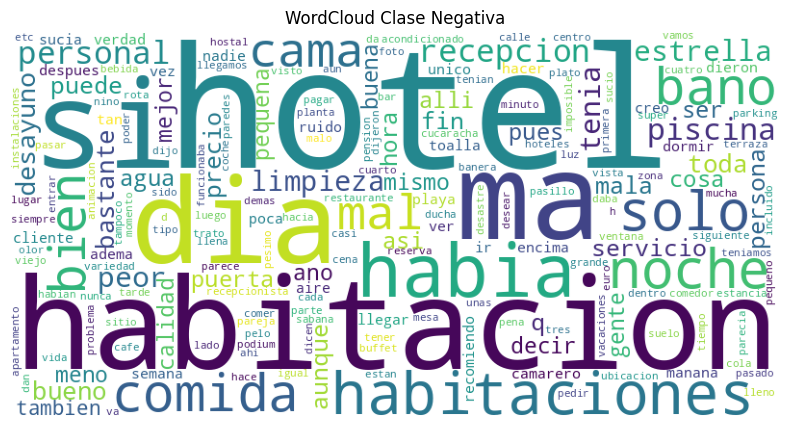

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud para la Clase Negativa (0)
texto_unido_n = ' '.join(df[df['rank'] == 0]['review_tokenizado'].sum())
wordcloud_n = WordCloud( width=800, height=400, background_color='white', collocations=False).generate(texto_unido_n)

plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Negativa')
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

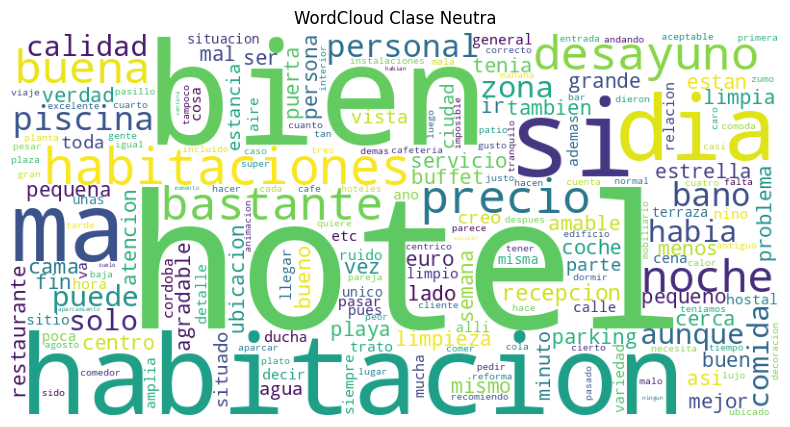

In [ ]:
# WordCloud para la Clase Neutra (1)
texto_unido_n = ' '.join(df[df['rank'] == 1]['review_tokenizado'].sum())
wordcloud_n = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(texto_unido_n)

plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Neutra')
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

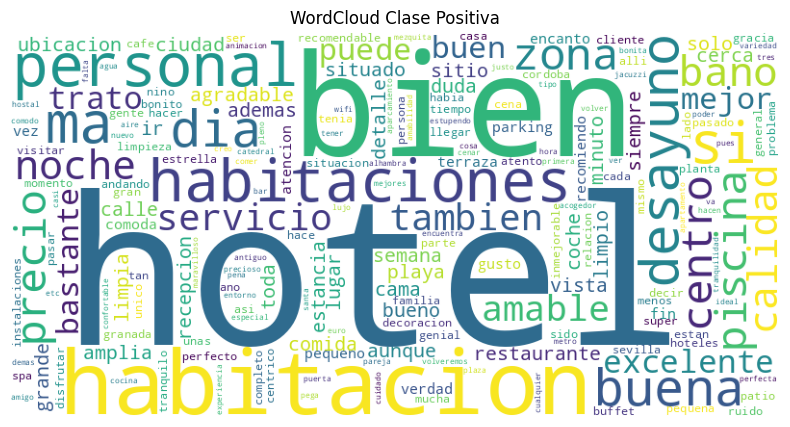

In [ ]:
# WordCloud para la Clase Positiva (2)
texto_unido_p = ' '.join(df[df['rank'] == 2]['review_tokenizado'].sum())
wordcloud_p = WordCloud( width=800, height=400, background_color='white', collocations=False).generate(texto_unido_p)
plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Positiva')
plt.imshow(wordcloud_p)
plt.axis('off')
plt.show()

Es importante distinguir que hay factores transversales, que  aparecen mencionados en todas las nubes de palabras. Ejemplos son "plato" o "comida" que se refieren a la calidad de ordenado por el cliente. Sin embargo, "atenci√≥n" es clave, indicando que no solo es relevante para los comensales la calidad de la comida, sino tambi√©n como son atendidos.

Adicionalmente, hay factores espec√≠ficos negativos y positivos que solo aparecen en una de las nubes, tales como "caro" o "demoraron" en la negativa o "rico/a", "ambiente" o "variedad" en la positiva. Aqu√≠ hay factores nuevos que van m√°s all√° de la comida misma y la atenci√≥n que son relevantes en la calidad de servicio.
Estos factores son importantes para la m√°quina ya que les ser√° m√°s f√°cil identificarlos en una clase y no en la otra para identificar polaridad. Para los factores comunes, la m√°quina debe deducirlos del contexto y de los adjetivos calificativos que abundan en las nubes ("mal", "malo/a", "buen", etc.)


Veamos ahora los bigramas o conceptos basados en dos palabras:

## Bigramas


Un bigrama o digrama es un grupo de dos letras, dos s√≠labas, o dos palabras. Los bigramas son utilizados com√∫nmente como base para el simple an√°lisis estad√≠stico de texto. Se utilizan en uno de los m√°s exitosos modelos de lenguaje para el reconocimiento de voz.

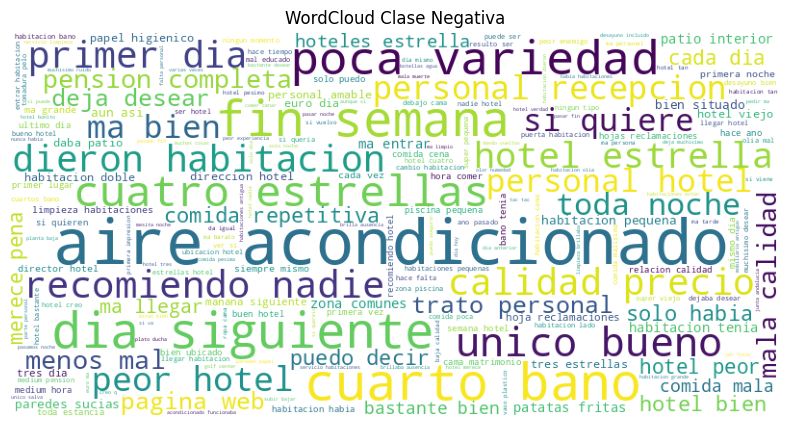

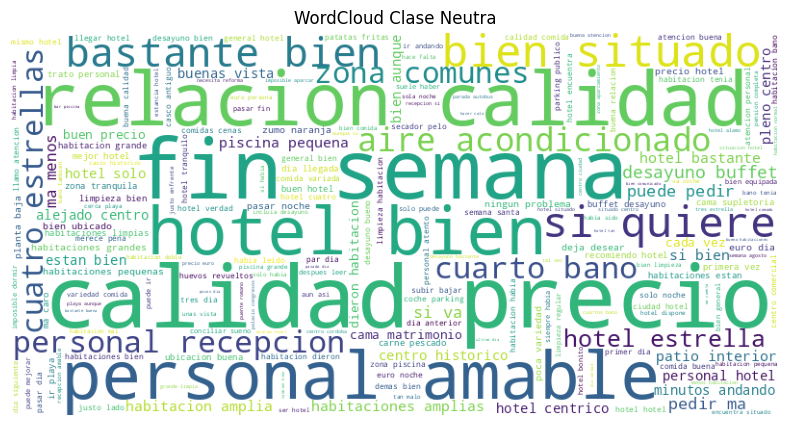

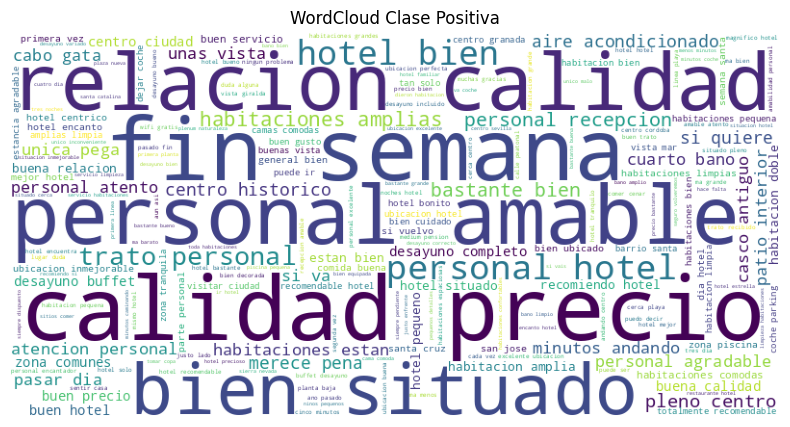

In [ ]:
# Clase Negativa (0)
texto_unido_n = ' '.join(df[df['rank'] == 0]['review_tokenizado'].sum())
wordcloud_n = WordCloud(width=800, height=400, background_color='white', collocation_threshold = 3).generate(texto_unido_n)
plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Negativa')
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

# Clase Negativa (1)
texto_unido_n = ' '.join(df[df['rank'] == 1]['review_tokenizado'].sum())
wordcloud_n = WordCloud(width=800, height=400, background_color='white', collocation_threshold = 3).generate(texto_unido_n)
plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Neutra')
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

# Clase Positiva (2)
texto_unido_p = ' '.join(df[df['rank'] == 2]['review_tokenizado'].sum())
wordcloud_p = WordCloud( width=800, height=400, background_color='white', collocation_threshold = 3).generate(texto_unido_p)
plt.figure(figsize=(10, 5))
plt.title('WordCloud Clase Positiva')
plt.imshow(wordcloud_p)
plt.axis('off')
plt.show()

La nube de palabras de bigramas es capaz de distinguir claramente factores importantes detectados con unigramas al incorporar adjetivos calificativos. Por ejemplo, "atenci√≥n", que aparec√≠a en la nube negativa, neutra y positiva, ahora se distingue claramente como "mala" o "p√©sima" atenci√≥n en la nube de bigramas negativos, y "buena" o "excelente" atenci√≥n en la nube de bigramas positivos. Esto es clave, ya que las m√°quinas hasta antes de aprendizaje profundo se enfocaban mucho en palabras independientes, y era m√°s dif√≠cil reconocer contexto. Si una palabra como atenci√≥n aparec√≠a homog√©neamente en las tres clases, entonces no era relevante. Los bigramas son entonces √∫tiles para obtener m√°s informaci√≥n.

Otra ventaja de los bigramas es que aparecen conceptos combinados que solo en su conjunto son relevantes y hacen sentido. Aparecen platos y tragos como "pisco sour" o "papas fritas", y se distinguen comidas de diferentes or√≠genes ("comida peruana" o "comida chilena").  

Para finalizar, guardamos la base de datos pre-procesada como archivo "pickle",que es un formato de Python adecuado para este tipo de estructuras secuenciales.

In [ ]:
# Guardar DataFrame como pickle
df.to_pickle('/content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/df_procesado.pkl')

# Para cargar
# df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_procesado.pkl')

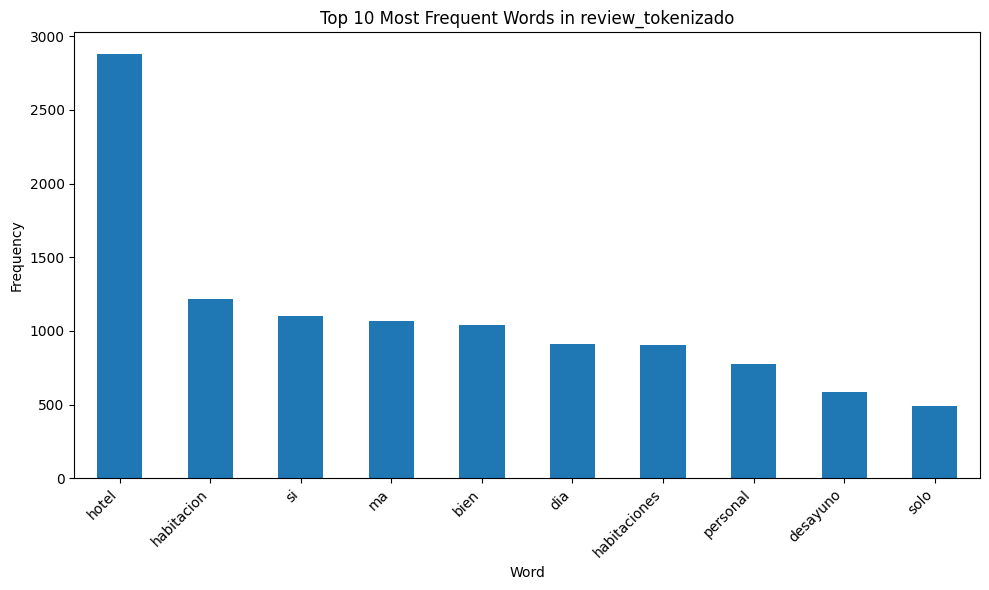

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of lists in review_tokenizado
all_words = [word for sublist in df['review_tokenizado'] for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Create a pandas Series for easier plotting
top_10_series = pd.Series(dict(top_10_words))

# Create the bar chart
plt.figure(figsize=(10, 6))
top_10_series.plot(kind='bar')
plt.title('Top 10 Most Frequent Words in review_tokenizado')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clasificaci√≥n y comparaci√≥n de modelos

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from scipy.sparse import hstack
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_pickle('/content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/df_procesado.pkl')
df = df.reset_index(drop=True)

def join_if_list(x):
    if isinstance(x, list):
        return " ".join(map(str, x))
    return str(x)

for col in ["review_texto_final","abstract_texto_final",
            "review_tokenizado","abstract_tokenizado"]:
    if col in df.columns:
        df[col] = df[col].apply(join_if_list)

if {"review_texto_final","abstract_texto_final"}.issubset(df.columns):
    review_col, abstract_col = "review_texto_final", "abstract_texto_final"
    lemma_variant = True
elif {"review_tokenizado","abstract_tokenizado"}.issubset(df.columns):
    review_col, abstract_col = "review_tokenizado", "abstract_tokenizado"
    lemma_variant = False
else:
    raise ValueError("No se encontraron columnas de review/abstract esperadas.")

# 'rank' as the target column
target_col = 'rank'
if target_col not in df.columns:
     raise ValueError(f"No se encontr√≥ la columna de etiquetas '{target_col}'.")

y_raw = df[target_col]
if y_raw.dtype == "O" or str(y_raw.dtype).startswith("category"):
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    classes = list(le.classes_)
else:
    y = y_raw.values
    classes = sorted(pd.Series(y).unique().tolist())

print("üîÑ Dividiendo en train/test...")
idx_train, idx_test = train_test_split(
    np.arange(len(df)),
    test_size=0.2,
    random_state=42,
    stratify=y
)

def build_vectorizer():
    return TfidfVectorizer(strip_accents="unicode",
                           lowercase=True,
                           ngram_range=(1,2),
                           min_df=1)

def build_vectorizer_char():
    return TfidfVectorizer(analyzer="char",
                           ngram_range=(3,5),
                           min_df=1)

def get_models():
    return {
        "LogReg": LogisticRegression(max_iter=200),
        "NaiveBayes": MultinomialNB(),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
        "NeuralNet": MLPClassifier(hidden_layer_sizes=(128,), max_iter=50, random_state=42),
        "LinearSVM": LinearSVC()
    }

def evaluate_models(X_train, X_test, y_train, y_test, scenario):
    print(f"\nüöÄ Entrenando y evaluando modelos para escenario: {scenario}")
    results, reports = [], {}
    for name, model in tqdm(get_models().items(), desc=f"Modelos {scenario}"):
        pipe = Pipeline([("clf", model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
            y_test, y_pred, average="macro", zero_division=0
        )
        prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
            y_test, y_pred, average="weighted", zero_division=0
        )

        results.append({
            "Scenario": scenario,
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision_macro": prec_macro,
            "Recall_macro": rec_macro,
            "F1_macro": f1_macro,
            "Precision_weighted": prec_w,
            "Recall_weighted": rec_w,
            "F1_weighted": f1_w
        })
        reports[name] = classification_report(y_test, y_pred, zero_division=0)
    return pd.DataFrame(results), reports

def run_scenario(text_train, text_test, scenario_name):
    vw, vc = build_vectorizer(), build_vectorizer_char()
    Xw_tr = vw.fit_transform(text_train)
    Xw_te = vw.transform(text_test)
    Xc_tr = vc.fit_transform(text_train)
    Xc_te = vc.transform(text_test)
    return evaluate_models(hstack([Xw_tr, Xc_tr]),
                           hstack([Xw_te, Xc_te]),
                           y[idx_train], y[idx_test],
                           scenario_name)

print("\n=== Escenario 1: Solo Review ===")
res_review, rep_review = run_scenario(
    df.iloc[idx_train][review_col].fillna(""),
    df.iloc[idx_test][review_col].fillna(""),
    "Review only"
)

res_abs, rep_abs = run_scenario(
    df.iloc[idx_train][abstract_col].fillna(""),
    df.iloc[idx_test][abstract_col].fillna(""),
    "Abstract only"
)

print("\n=== Escenario 3: Review + Abstract ===")
rvw, rvc = build_vectorizer(), build_vectorizer_char()
avw, avc = build_vectorizer(), build_vectorizer_char()

print("Vectorizando Review...")
Rw_tr = rvw.fit_transform(df.iloc[idx_train][review_col].fillna(""))
Rw_te = rvw.transform(df.iloc[idx_test][review_col].fillna(""))
Rc_tr = rvc.fit_transform(df.iloc[idx_train][review_col].fillna(""))
Rc_te = rvc.transform(df.iloc[idx_test][review_col].fillna(""))

print("Vectorizando Abstract...")
Aw_tr = avw.fit_transform(df.iloc[idx_train][abstract_col].fillna(""))
Aw_te = avw.transform(df.iloc[idx_test][abstract_col].fillna(""))
Ac_tr = avc.fit_transform(df.iloc[idx_train][abstract_col].fillna(""))
Ac_te = avc.transform(df.iloc[idx_test][abstract_col].fillna(""))

print("Entrenando modelos combinados...")
X_comb_tr = hstack([Rw_tr, Rc_tr, Aw_tr, Ac_tr])
X_comb_te = hstack([Rw_te, Rc_te, Aw_te, Ac_te])
res_comb, rep_comb = evaluate_models(X_comb_tr, X_comb_te,
                                     y[idx_train], y[idx_test],
                                     "Review + Abstract")


out_dir = Path("/content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1")
out_dir.mkdir(exist_ok=True, parents=True)

results = pd.concat([res_review, res_abs, res_comb], ignore_index=True)
results.to_csv(out_dir / "model_metrics_all_scenarios.csv", index=False)

reports_txt = [f"Classes: {classes}\n\n"]
for scen, repdict in [("Review only", rep_review),
                      ("Abstract only", rep_abs),
                      ("Review + Abstract", rep_comb)]:
    reports_txt.append(f"===== {scen} =====\n")
    for model_name, rep in repdict.items():
        reports_txt.append(f"\n--- {model_name} ---\n{rep}\n")

with open(out_dir / "classification_reports.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(reports_txt))

print("CSV de m√©tricas:", out_dir / "model_metrics_all_scenarios.csv")
print("Reportes detallados:", out_dir / "classification_reports.txt")

Mounted at /content/gdrive
üîÑ Cargando DataFrame procesado...
‚úÖ DataFrame cargado con 1815 filas.
üîÑ Codificando etiquetas...
‚úÖ Etiquetas codificadas: [0, 1, 2]
üîÑ Dividiendo en train/test...
‚úÖ Train: 1452 | Test: 363

=== Escenario 1: Solo Review ===

üöÄ Entrenando y evaluando modelos para escenario: Review only


Modelos Review only: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [05:17<00:00, 52.92s/it]



üöÄ Entrenando y evaluando modelos para escenario: Abstract only


Modelos Abstract only: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:46<00:00,  7.76s/it]



=== Escenario 3: Review + Abstract ===
Vectorizando Review...
Vectorizando Abstract...
Entrenando modelos combinados...

üöÄ Entrenando y evaluando modelos para escenario: Review + Abstract


Modelos Review + Abstract: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [04:58<00:00, 49.69s/it]


üíæ Guardando resultados...
‚úÖ CSV de m√©tricas: /content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/model_metrics_all_scenarios.csv
‚úÖ Reportes detallados: /content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/classification_reports.txt
üéØ Proceso finalizado.


An√°lisis de la influencia de la lematizaci√≥n

In [ ]:
print("\n=== Comparando versi√≥n lematizada vs. no lematizada ===")

has_lemma = {"review_texto_final", "abstract_texto_final"}.issubset(df.columns)
has_token = {"review_tokenizado", "abstract_tokenizado"}.issubset(df.columns)

if has_lemma and has_token:
    # Lematizados
    res_lemma_review, _ = run_scenario(
        df.iloc[idx_train]["review_texto_final"].fillna(""),
        df.iloc[idx_test]["review_texto_final"].fillna(""),
        "Review only (lemmatized)"
    )
    res_lemma_abs, _ = run_scenario(
        df.iloc[idx_train]["abstract_texto_final"].fillna(""),
        df.iloc[idx_test]["abstract_texto_final"].fillna(""),
        "Abstract only (lemmatized)"
    )

    # Tokenizados
    res_tok_review, _ = run_scenario(
        df.iloc[idx_train]["review_tokenizado"].fillna(""),
        df.iloc[idx_test]["review_tokenizado"].fillna(""),
        "Review only (tokenized)"
    )
    res_tok_abs, _ = run_scenario(
        df.iloc[idx_train]["abstract_tokenizado"].fillna(""),
        df.iloc[idx_test]["abstract_tokenizado"].fillna(""),
        "Abstract only (tokenized)"
    )

    lemma_results = pd.concat([res_lemma_review, res_lemma_abs], ignore_index=True)
    token_results = pd.concat([res_tok_review, res_tok_abs], ignore_index=True)

    comp_results = pd.concat([lemma_results.assign(Variant="Lemmatized"),
                              token_results.assign(Variant="Tokenized")],
                             ignore_index=True)

    comp_path = out_dir / "comparison_lemma_vs_token.csv"
    comp_results.to_csv(comp_path, index=False)
    print("Resultados comparativos guardados en:", comp_path)

else:
    print("No se encontraron ambas versiones (lematizada y tokenizada) en el DataFrame.")


=== Comparando versi√≥n lematizada vs. no lematizada ===

üöÄ Entrenando y evaluando modelos para escenario: Review only (lemmatized)


Modelos Review only (lemmatized): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [05:17<00:00, 52.99s/it]



üöÄ Entrenando y evaluando modelos para escenario: Abstract only (lemmatized)


Modelos Abstract only (lemmatized): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:46<00:00,  7.76s/it]



üöÄ Entrenando y evaluando modelos para escenario: Review only (tokenized)


Modelos Review only (tokenized): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [04:48<00:00, 48.07s/it]



üöÄ Entrenando y evaluando modelos para escenario: Abstract only (tokenized)


Modelos Abstract only (tokenized): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:50<00:00,  8.50s/it]

‚úÖ Resultados comparativos guardados en: /content/gdrive/MyDrive/202520/ANALITICA TEXTUAL/T1/comparison_lemma_vs_token.csv


Comparaci√≥n de los resultados del escenario ‚ÄúReview only‚Äù

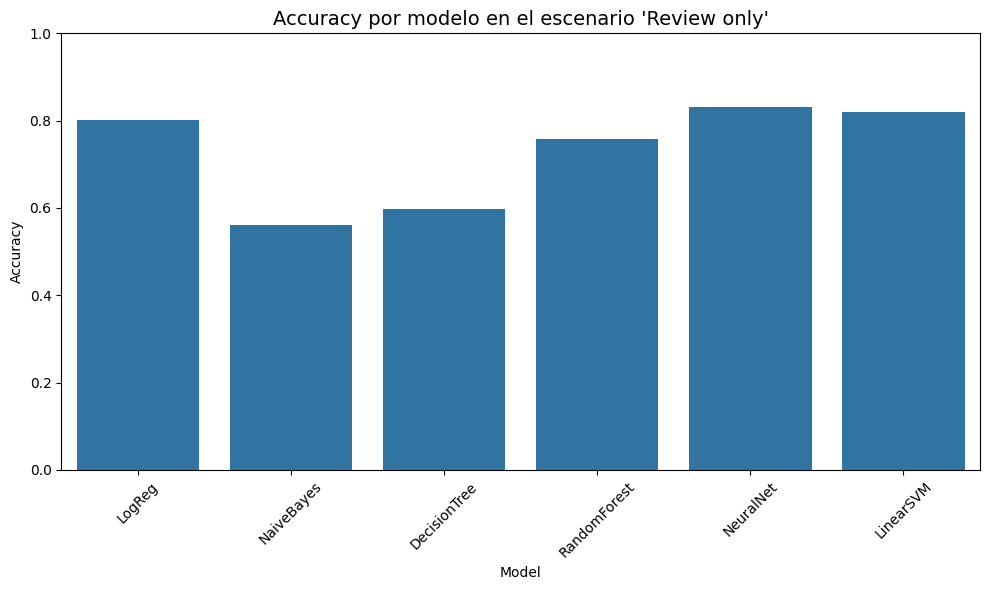

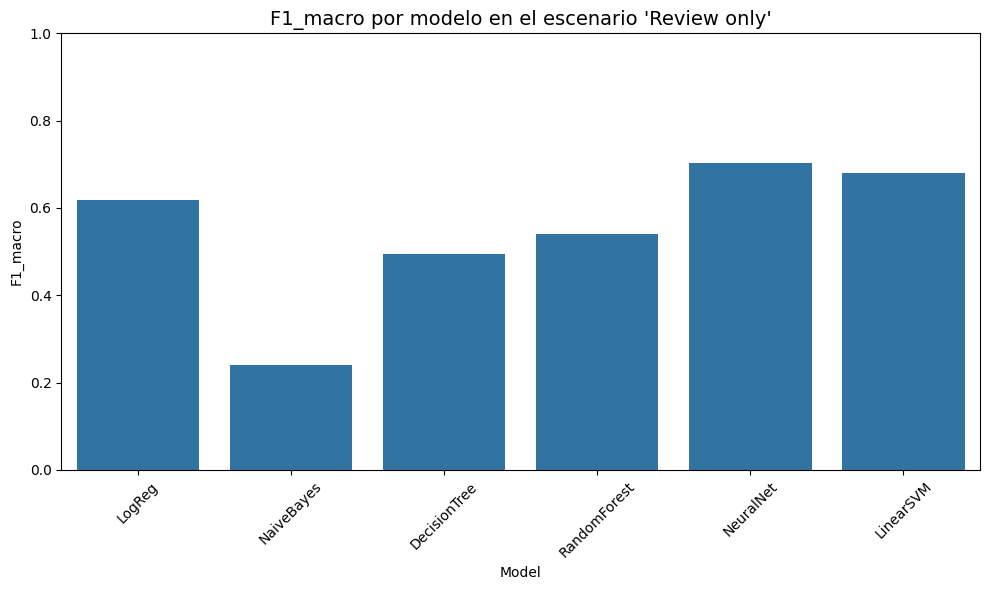

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_metrics = pd.read_csv(out_dir / "model_metrics_all_scenarios.csv")

df_review_only = df_metrics[df_metrics["Scenario"] == "Review only"]

df_plot = df_review_only[["Scenario", "Model", "Accuracy", "F1_macro"]]

# Gr√°fico Accuracy por modelo en el escenario "Review only"
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x="Model", y="Accuracy")
plt.title("Accuracy por modelo en el escenario 'Review only'", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Gr√°fico F1_macro por modelo en el escenario "Review only"
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x="Model", y="F1_macro")
plt.title("F1_macro por modelo en el escenario 'Review only'", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel("F1_macro")
plt.tight_layout()
plt.show()

Comparaci√≥n de Escenarios (Review, Abstract, Review+Abstract)

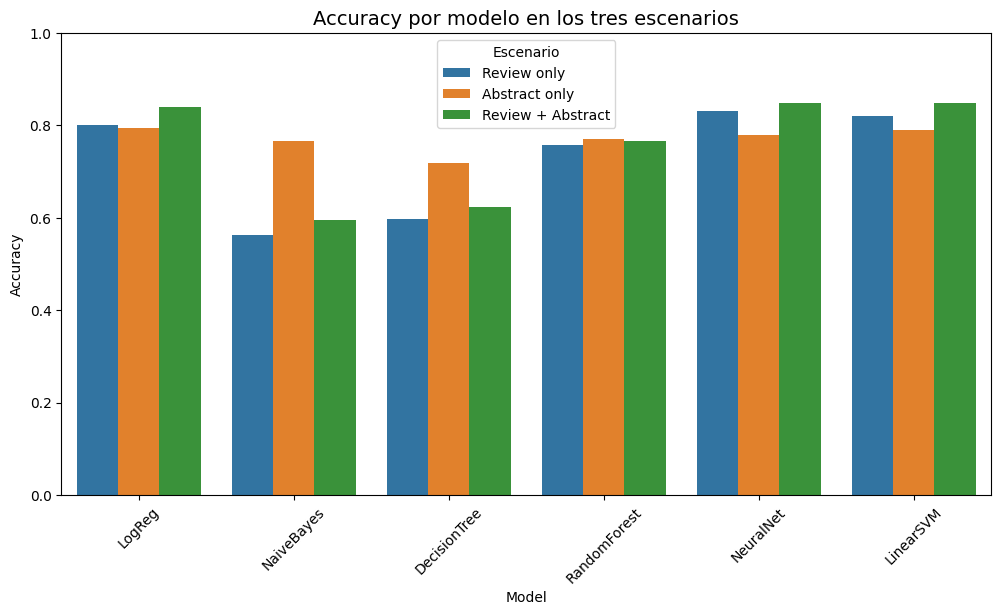

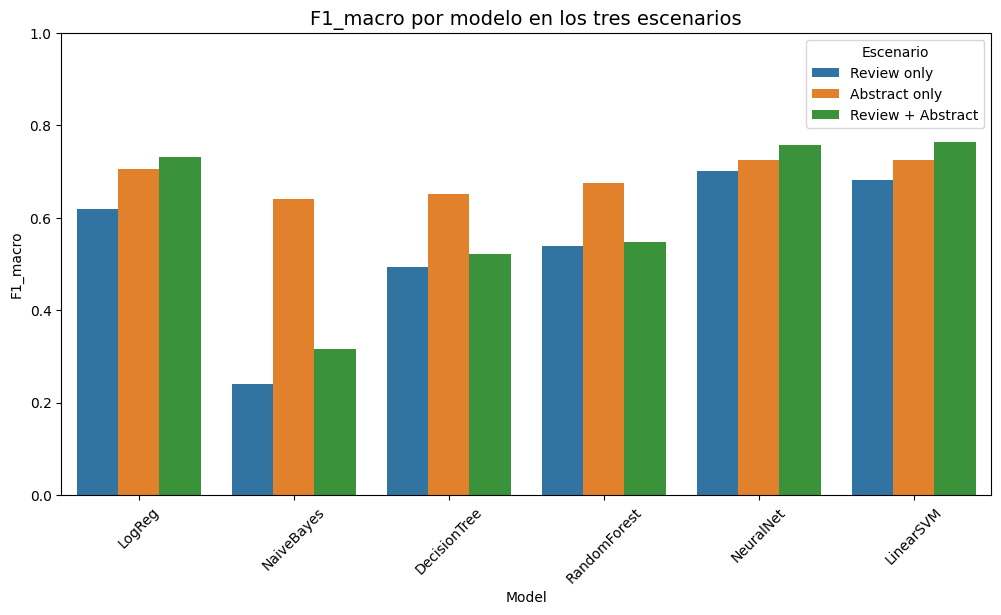

In [ ]:
df_plot = df_metrics[["Scenario", "Model", "Accuracy", "F1_macro"]]

# Gr√°fico Accuracy por escenario y modelo
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x="Model", y="Accuracy", hue="Scenario")
plt.title("Accuracy por modelo en los tres escenarios", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(title="Escenario")
plt.show()

# Gr√°fico F1_macro por escenario y modelo
plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x="Model", y="F1_macro", hue="Scenario")
plt.title("F1_macro por modelo en los tres escenarios", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(title="Escenario")
plt.show()

Comparaci√≥n Lematizaci√≥n vs Tokenizaci√≥n

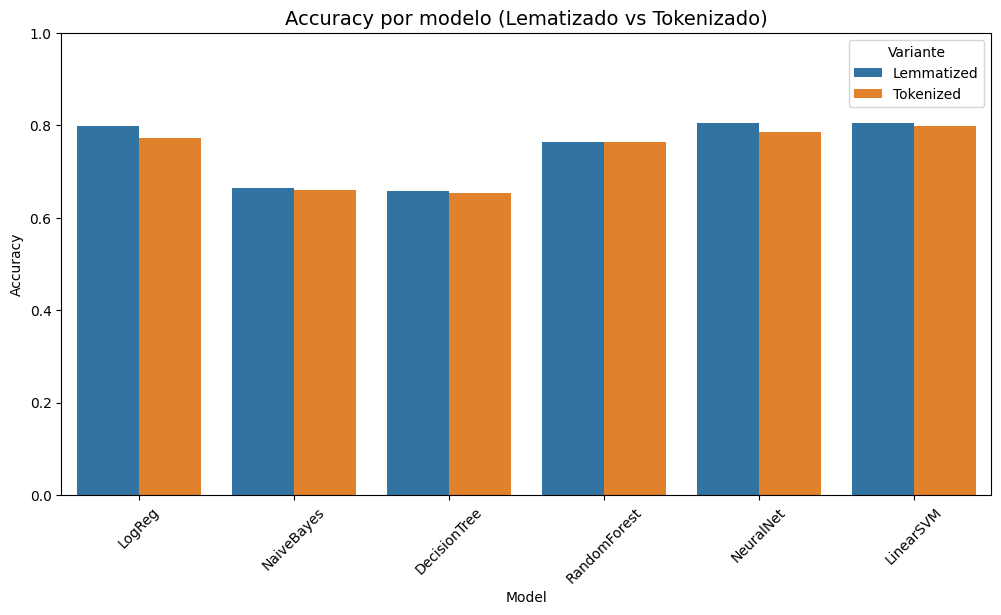

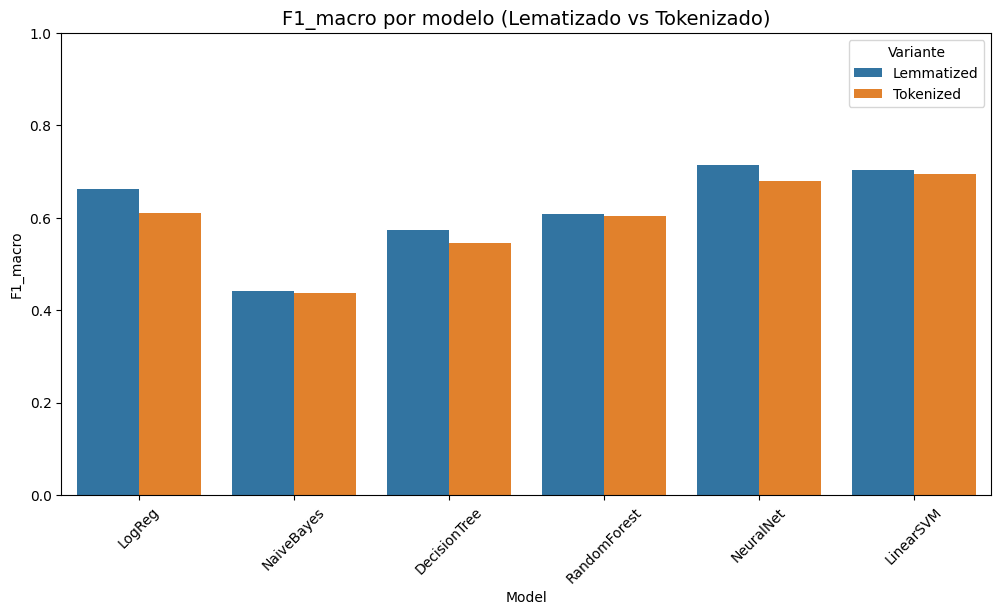

In [ ]:
df_comp = pd.read_csv(out_dir / "comparison_lemma_vs_token.csv")

df_comp_plot = df_comp[["Scenario", "Model", "Accuracy", "F1_macro", "Variant"]]

# Gr√°fico Accuracy
plt.figure(figsize=(12,6))
sns.barplot(data=df_comp_plot, x="Model", y="Accuracy", hue="Variant", errorbar=None)
plt.title("Accuracy por modelo (Lematizado vs Tokenizado)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(title="Variante")
plt.show()

# Gr√°fico F1_macro
plt.figure(figsize=(12,6))
sns.barplot(data=df_comp_plot, x="Model", y="F1_macro", hue="Variant", errorbar=None)
plt.title("F1_macro por modelo (Lematizado vs Tokenizado)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(title="Variante")
plt.show()

Heatmap de Accuracy por Modelo y Escenario

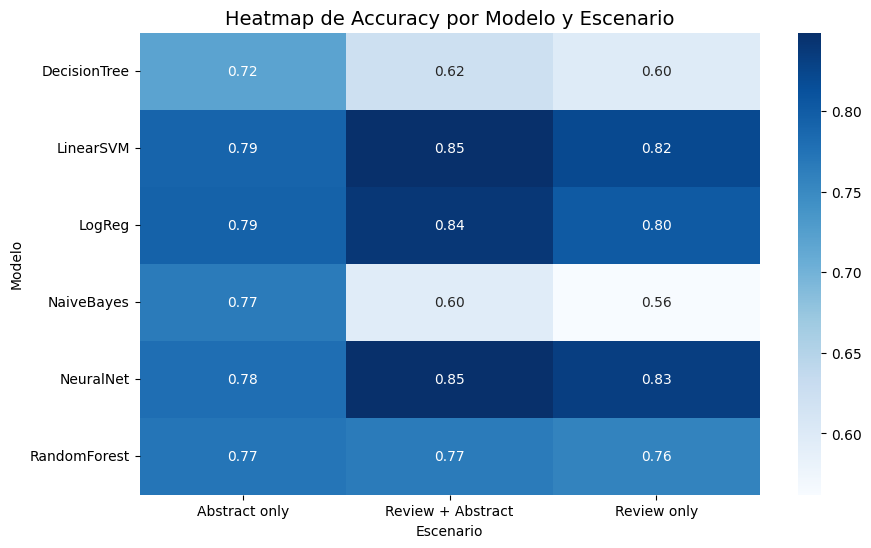

In [ ]:
pivot_acc = df_metrics.pivot(index="Model", columns="Scenario", values="Accuracy")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_acc, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Heatmap de Accuracy por Modelo y Escenario", fontsize=14)
plt.ylabel("Modelo")
plt.xlabel("Escenario")
plt.show()

Heatmap de F1 Macro por Modelo y Escenario

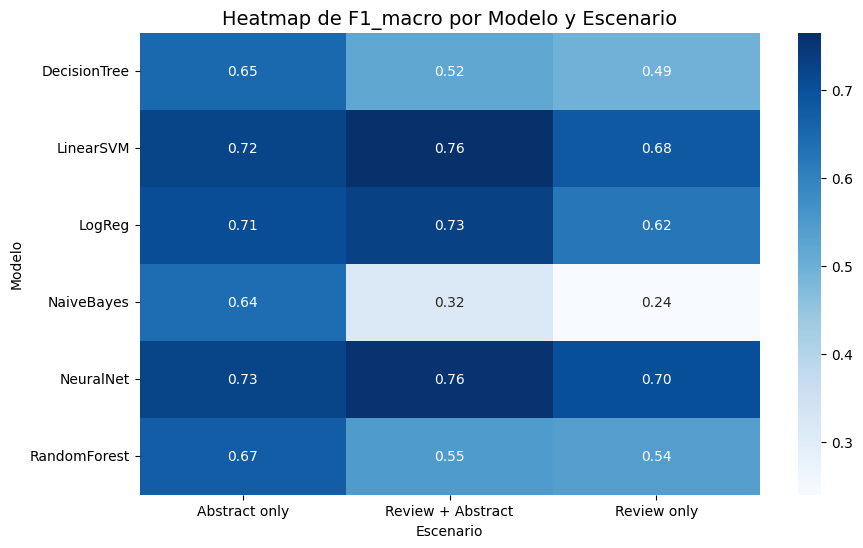

In [ ]:
pivot_f1 = df_metrics.pivot(index="Model", columns="Scenario", values="F1_macro")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_f1, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Heatmap de F1_macro por Modelo y Escenario", fontsize=14)
plt.ylabel("Modelo")
plt.xlabel("Escenario")
plt.show()